### <center> 8. XML. Что это?

→ Аббревиатура **XML** расшифровывается как *eXtensible Markup Language* — расширяемый язык разметки. Он (язык) позволяет описывать документы, используя теги.

В отличие от *HTML*, где теги заранее чётко заданы, в *XML* мы можем задавать теги сами.

>Файлы *XML* не всегда имеют жёсткую структуру и не обязаны её иметь, но чаще всего какая-то структура внутри файла будет. Почему? Потому что обычно *XML* не пишут вручную. Такие файлы генерируются кодом и читаются тоже кодом. Поэтому при наличии понятной структуры обработка файла становится намного проще.

### <center>  9. XML. Контент XML-файла

##### <center> ИЗВЛЕКАЕМ КОНТЕНТ ИЗ XML-ФАЙЛА

Данные в формате *XML* имеют **древовидную** структуру. 

>**Что такое дерево?** Это структура, которая имеет узлы и связи между ними. Самый верхнеуровневый узел называется **корнем**, а всё, что находится в самом низу, называется **листьями**. 

Для работы с *XML*-файлами мы будем использовать модуль *ElementTree* , входящий в стандартный пакет *xml*. Этот модуль позволит нам «перемещаться» по дереву *XML* и смотреть, что находится в каждом его узле, начиная с корня и заканчивая листьями.

Импортируем этот модуль под псевдонимом *ET*: 

In [40]:
# Импортируем модуль ElementTree
import xml.etree.ElementTree as ET

Для работы со структурой файла `menu.xml` считаем его содержимое в переменную `tree`, выполнив код:

In [41]:
tree = ET.parse('menu.xml')

##### <center> КОРЕНЬ

Запишем в переменную `root` корневой узел дерева `tree` и посмотрим, как выглядит содержимое переменной `root`, для чего выполним код:

In [42]:
root = tree.getroot()
display(root)

<Element 'menu' at 0x0000022EB2E40270>

Мы видим, что в корне находится '`menu`'. Всё правильно, мы и предполагали увидеть именно это. 

**Какой тип у этого объекта?** Если мы вызовем встроенный в *Python* метод `type()` и передадим ему `root` , то увидим, что это тип `xml.etree.ElementTree.Element`. Такой тип будет у любого узла в дереве.

In [43]:
display(type(root))

xml.etree.ElementTree.Element

##### <center> ПОТОМКИ

Для того чтобы посмотреть список потомков корневого узла, выполним следующий код:

In [44]:
display(list(root))

[<Element 'dish' at 0x0000022EB2E40310>,
 <Element 'dish' at 0x0000022EB2E404F0>]

Если у узла нет потомков, то вернётся пустой список — [].

Итак, использование `list(root)` возвращает список потомков указанного узла. У узла `root`, который представляет меню, два потомка, а именно — два блюда, которые представлены тегами `dish`.

Для того чтобы получить список потомков второго блюда в нашем меню и вывести его на экран, выполним код:

In [45]:
display(list(root[1]))

[<Element 'price' at 0x0000022EB2E40540>,
 <Element 'weight' at 0x0000022EB2E40590>,
 <Element 'class' at 0x0000022EB2E405E0>]

Таким образом, у второго потомка узла `root` —  три потомка


##### <center> АТРИБУТЫ И ТЕГИ

Как было сказано ранее, у узлов могут быть параметры, или **атрибуты**. Например, у узлов `dish` есть атрибут `name`, который хранит название блюда.

Мы можем непосредственно обратиться к атрибутам, используя `attrib`.

Выведем на экран атрибуты первого блюда из меню:

In [46]:
display(root[0].attrib)

{'name': 'Кура'}

В *XML*-узлах часто хранятся количественные показатели. Эти показатели хранятся в виде текста, и прочитать их можно, обратившись к атрибуту `text` у соответствующего объекта типа `ElementTree.Element`.

Например, возьмём узел `price` первого блюда из меню:

In [47]:
display(root[0][0])

<Element 'price' at 0x0000022EB2E40360>

Теперь прочитаем значение этого узла с помощью `text`:

In [48]:
display(root[0][0].text)

'40'

>Все значения в *XML*, даже числовые, хранятся как строки, поэтому преобразовывать их к нужному типу вам нужно самим.

Например, в данном случае можно обернуть значение стоимости в `int()` или `float()`.

Если вы хотите прочитать наименование тега конкретного узла, необходимо использовать `tag`. Например, получим наименование тега корневого узла:

In [49]:
display(root.tag)

'menu'

In [50]:
display(root[0][2].tag)

'class'

### <center> ИСПОЛЬЗОВАНИЕ ЦИКЛОВ

На этом шаге мы решим задачу вывода на экран наименование всех блюд из меню, а также информацию о них (иными словами, нам необходимо **обойти дерево и вывести на экран значения его листьев**).

Используя цикл `for`, автоматизируем обход дерева. Для этого напишем следующий код:

In [51]:
for dish in root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



✍️ В этом коде реализован следующий алгоритм:

- В первом (внешнем) цикле перебираем потомков корня дерева (`root`). Потомки перебираются последовательно при помощи переменной `dish`. Это отдельные блюда из меню.

- Во втором (вложенном) цикле аналогичным образом перебираем потомков каждого блюда. Этими потомками являются параметры блюда — его цена (`price`), вес (`weight`) и класс (`class`).

- После этого выводим на экран название блюда (значение атрибута `name`), название очередного параметра (`tag`) и его значение (`text`).

- Дополнительная функция `print()` в цикле верхнего уровня предназначена для организации более удобного восприятия информации — между отдельными блюдами будет выведена пустая строка.

- На выходе получаем:

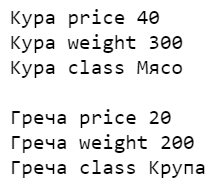

### <center> 10. XML. Загружаем, создаем, сохраняем

##### <center> ЗАГРУЖАЕМ ДАННЫЕ ИЗ XML-ФАЙЛА В DATAFRAME

✍ Реализуем следующий алгоритм:

1. Загрузить данные из *XML*-файла `menu.xml` в переменную `root`.

2. Создать пустой список `df_list` (в него будем добавлять строчки итоговой таблицы).

3. Заранее создать список `column_names` с именами столбцов — название блюда (`name`), его цена (`price`), вес (`weight`) и класс (`class`).

4. В цикле организовать обход *xml*-дерева из корня по всем потомкам.

5. На каждой итерации цикла сформировать в виде списка строку таблицы, содержащую информацию: наименование блюда (атрибут `name` узла `dish`) и значения потомков этого узла — узлов `price`, `weight`, `class`.

6. Добавить сформированную строку в список `df_list`, используя метод `append()`.

7. Сформировать из вложенного списка *DataFrame*. Имена для столбцов взять из списка `column_names`.

In [52]:
import pandas as pd
# Импортируем модуль ElementTree
import xml.etree.ElementTree as ET
# Считываем файл
tree = ET.parse('menu.xml')
# Записываем переменную в корневой узел дерева
root = tree.getroot()

#import pandas as pd
# Создаем список с названиями столбцов
column_names = ['name', 'price', 'weight', 'class']
# Создаем пустой список для строчек итоговой таблицы
df_list = []

# Организуем обход xml-дерева
# Перебираем отдельные блюда из меню
for dish in root:
    # Формируем строку таблицы - наименование блюда (name узла dish)
    # и значения потомков этого узла - узлов price, weight, class
    row = [dish.attrib['name'], dish[0].text, dish[1].text, dish[2].text]
    # Добавляем строку в список
    df_list.append(row)

# Формируем DataFrame - имена столбцов из списка column_names
# Строки - row
df = pd.DataFrame(df_list, columns=column_names)

display(df)

,name,price,weight,class
0,Кура,40,300,Мясо
1,Греча,20,200,Крупа


##### <center> СОЗДАЕМ XML-ФАЙЛ

→ Воссоздадим структуру нашего исходного XML-файла с нуля,  руководствуясь общими рекомендациями.

Чтобы создать корень дерева, используем метод `Element()` из класса `ElementTree`:

In [53]:
import xml.etree.ElementTree as ET

new_root = ET.Element('menu')
display(new_root)

<Element 'menu' at 0x0000022EB2E264D0>

Теперь мы можем добавлять новые узлы в наше дерево, используя метод `SubElement()` из того же класса.

Добавим в наше меню двух потомков корневого узла, которые будут представлять два блюда, то есть будут узлами `dish`:

In [54]:
dish1 = ET.SubElement(new_root, 'dish', name='Кура')

dish2 = ET.SubElement(new_root, 'dish', name='Греча')

display(list(new_root))

[<Element 'dish' at 0x0000022EB2E12890>,
 <Element 'dish' at 0x0000022EB2DE7E70>]

В метод `SubElement()` мы передали **первым** аргументом *узел*, к которому добавляем потомка, **вторым** аргументом — наименование *нового тега* (`dish`),  **третьим** аргументом — наименование *атрибута нового узла*( `name` ) и его *значение*.

>Аналогичным образом можно добавлять новые узлы к любым существующим узлам, не только к корню.

Добавим в создаваемую структуру по три потомка (атрибута) к двум новым узлам, которые будут содержать информацию о блюде — о его цене (*price*), весе (*weight*) и классе (*class*), а также значение этих атрибутов:

In [55]:
price1 = ET.SubElement(dish1, "price").text = "40"
weight1 = ET.SubElement(dish1, "weight").text = "300"
class1 = ET.SubElement(dish1, "class").text = "Мясо"
display(list(dish1))

price2 = ET.SubElement(dish2, "price").text = "20"
weight2 = ET.SubElement(dish2, "weight").text = "200"
class2 = ET.SubElement(dish2, "class").text = "Крупа"
display(list(dish2))

[<Element 'price' at 0x0000022EB2E12430>,
 <Element 'weight' at 0x0000022EB2E10720>,
 <Element 'class' at 0x0000022EB2E40810>]

[<Element 'price' at 0x0000022EB2E10C20>,
 <Element 'weight' at 0x0000022EB2D14270>,
 <Element 'class' at 0x0000022EB2E40220>]

In [56]:
# Проверим визуально корректность созданной нами структуры, 
# выполнив фрагмент кода, разработанного ранее:
for dish in new_root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



Созданная нами структура полностью идентична структуре исходного *XML*-файла.

##### <center> СОХРАНЕНИЕ XML-ФАЙЛА

>→ В финале работы с файлом XML-формата запишем созданную нами структуру как XML-файл на диск.

Преобразуем созданный нами объект типа `ElementTree.Element` в строку c помощью метода `tostring()`, передав наше новое дерево как аргумент. Сохраним эту строку на диске, используя стандартные средства *Python*::

In [57]:
new_root_string = ET.tostring(new_root)

with open('new_menu.xml', 'wb') as f:
    f.write(new_root_string)

✍️ Файл записан! Откройте его и посмотрите, что получилось.

Возможно, вы увидите проблему, связанную с кодировкой. Что делать в этом случае? Как вариант — записать файл, используя сам класс `ElementTree()` :

In [58]:
ET.ElementTree(new_root).write('new_menu_good.xml', encoding='utf-8')

Для этого мы передаём в класс `ElementTree()` наше дерево (не его строковое представление) и вызываем метод `write()`. В метод мы передаём путь к новому файлу и нужную нам кодировку.

# ДОПОЛНИТЕЛЬНЫЕ МАТЕРИАЛЫ

**ZIP**

- [Working with zip files in Python (англ.)](https://www.geeksforgeeks.org/working-zip-files-python/)
**Excel**

- [Автоматизация Excel с помощью Python (рус.)](https://medium.com/nastia-shu/больше-не-нужно-открывать-сотни-файлов-в-excel-e0a1f5a9e9a7)
- [Использование Python и Excel для обработки и анализа данных (рус.)](https://habr.com/ru/company/otus/blog/331998/)
- [How to Work with Excel files in Pandas (англ.)](https://towardsdatascience.com/how-to-work-with-excel-files-in-pandas-c584abb67bfb)
- [Pandas read_excel() – Reading Excel File in Python (англ.)](https://www.journaldev.com/33306/pandas-read_excel-reading-excel-file-in-python)
- [Python Excel Tutorial: The Definitive Guide (англ.)](https://www.datacamp.com/community/tutorials/python-excel-tutorial)
- [Tutorial Using Excel with Python and Pandas (англ.)](https://www.dataquest.io/blog/excel-and-pandas/)

**JSON**

- [Парсинг JSON (рус.)](https://all-python.ru/osnovy/json.html)
- [Working With JSON Data in Python (англ.)](https://realpython.com/python-json/)
- [Python JSON (англ.)](https://www.programiz.com/python-programming/json)

**XML**

- [Работа с XML из Python (рус.)](https://codecamp.ru/blog/python-manipulating-xml/)
- [Processing XML in Python — ElementTree (англ.)](https://towardsdatascience.com/processing-xml-in-python-elementtree-c8992941efd2)